In [6]:
import os, shutil
train_cats_dir='./data/train/cats'
train_dogs_dir = './data/train/dogs'
validation_cats_dir = './data/validation/cats'
validation_dogs_dir = './data/validation/dogs'
test_cats_dir = './data/test/cats'
test_dogs_dir = './data/test/dogs'
train_dir = './data/train/'
validation_dir='./data/validation/'
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1024
total training dog images: 1024
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [7]:
# build the network 
# instantiating a small convnet for dogs vs. cats classification 
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [27]:
# configuring the model for training 
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [28]:
# using imageDataGenerator to read images from directories 
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)             
test_datagen = ImageDataGenerator(rescale=1./255)   

train_generator = train_datagen.flow_from_directory(
        train_dir,                                             
        target_size=(150, 150),                               
        batch_size=20,
        class_mode='binary')                                   

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2048 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [30]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [32]:
# Fitting the model using a batch generator 
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 75s 750ms/step - loss: 0.6859 - acc: 0.5503 - val_loss: 0.6804 - val_acc: 0.5470
Epoch 2/30
100/100 [==============================] - 74s 740ms/step - loss: 0.6549 - acc: 0.6087 - val_loss: 0.6331 - val_acc: 0.6700
Epoch 3/30
100/100 [==============================] - 74s 740ms/step - loss: 0.6128 - acc: 0.6710 - val_loss: 0.6085 - val_acc: 0.6570
Epoch 4/30
100/100 [==============================] - 75s 746ms/step - loss: 0.5717 - acc: 0.7032 - val_loss: 0.5863 - val_acc: 0.6720
Epoch 5/30
100/100 [==============================] - 75s 747ms/step - loss: 0.5434 - acc: 0.7143 - val_loss: 0.5611 - val_acc: 0.7110
Epoch 6/30
100/100 [==============================] - 1013s 10s/step - loss: 0.5144 - acc: 0.7475 - val_loss: 0.5797 - val_acc: 0.6920
Epoch 7/30
100/100 [==============================] - 75s 751ms/step - loss: 0.4940 - acc: 0.7575 - val_loss: 0.5406 - val_acc: 0.7170
Epoch 8/30
100/100 [==============================] - 7

In [33]:
# saving the model 
model.save('cats_and_dogs_small_1.h5')

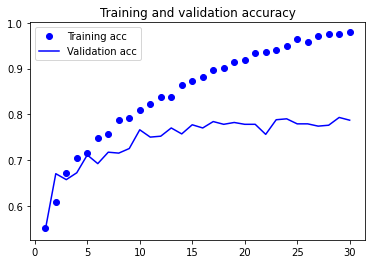

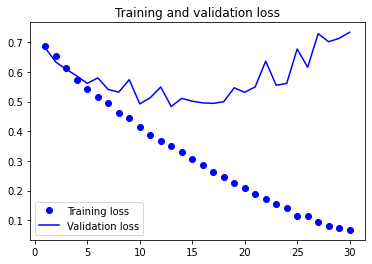

In [34]:
# Displaying curves of loss and accuracy during training 
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [35]:
# setting up a data augmentation configuration via ImageDataGenerator
# rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.
# width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
# shear_range is for randomly applying shearing transformations.
# zoom_range is for randomly zooming inside pictures.
# horizontal_flip is for randomly flipping half the images horizontally—relevant when there are no assumptions of horizontal asymmetry (for example, real-world pictures)
# ill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.


datagen = ImageDataGenerator(
    
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

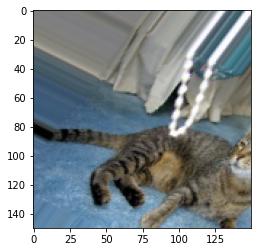

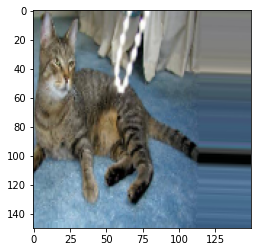

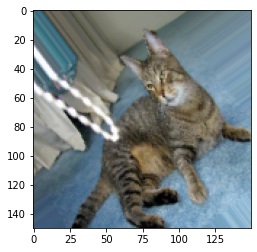

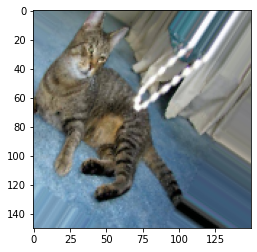

In [36]:
# Displaying some randomly augmented training images 

# Module with image-preprocessing utilities
from keras.preprocessing import image                           

fnames = [os.path.join(train_cats_dir, fname) for
     fname in os.listdir(train_cats_dir)]

# chooses one image to augment
img_path = fnames[3]                                            

# reads the image and resizes it 
img = image.load_img(img_path, target_size=(150, 150))   

#  Converts it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)  

#  Reshapes it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)                                   

# Generates batches of randomly transformed images. Loops indefinitely, so you need to break the loop at some point!
i = 0                                                           
for batch in datagen.flow(x, batch_size=1):                     
    plt.figure(i)                                               
    imgplot = plt.imshow(image.array_to_img(batch[0]))          
    i += 1                                                      
    if i % 4 == 0:                                              
        break                                                   

plt.show()

In [37]:
# defining a new convnet that includes dropout 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [38]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
# Note that the validation data shouldn’t be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)               

train_generator = train_datagen.flow_from_directory(
        train_dir,                                              
        target_size=(150, 150),       # resizes all images to 150x150                           
        batch_size=32,
        class_mode='binary')          # because you use binary_crossentropy loss, you need binary lables.                           

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2048 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/Library/Python/3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 81s 780ms/step - loss: 0.7005 - acc: 0.5071 - val_loss: 0.6848 - val_acc: 0.5600


In [39]:
model.save('cats_and_dogs_small_2.h5')
